<a href="https://colab.research.google.com/github/Azariagmt/jupyter-notebooks/blob/master/Classification_of_Malware_with_PE_headers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load dataset

In [1]:
import pandas as pd
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv")

In [5]:
print(train_data.shape)
train_data.head()

(3888, 56)


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0


In [14]:
train_data.dtypes

e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
e_cparhdr                        int64
e_minalloc                       int64
e_maxalloc                       int64
e_ss                             int64
e_sp                             int64
e_csum                           int64
e_ip                             int64
e_cs                             int64
e_lfarlc                         int64
e_ovno                           int64
e_res                          float64
e_oemid                          int64
e_oeminfo                        int64
e_res2                         float64
e_lfanew                         int64
Machine                          int64
NumberOfSections                 int64
CreationYear                     int64
PointerToSymbolTable             int64
NumberOfSymbols                  int64
SizeOfOptionalHeader             int64
Characteristics          

Split the data

In [15]:
X = train_data.drop(columns=['e_res', 'e_res2', 'class'])
y = train_data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

Train a logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression

reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Make predictions

In [17]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       582
           1       0.84      0.95      0.89       585

    accuracy                           0.88      1167
   macro avg       0.89      0.88      0.88      1167
weighted avg       0.89      0.88      0.88      1167



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[475 107]
 [ 30 555]]


[[1.19310752e-01 8.80689248e-01]
 [8.06461293e-01 1.93538707e-01]
 [9.99979537e-01 2.04630907e-05]
 ...
 [1.00000000e+00 5.77702295e-12]
 [1.04731378e-03 9.98952686e-01]
 [8.99465466e-01 1.00534534e-01]]


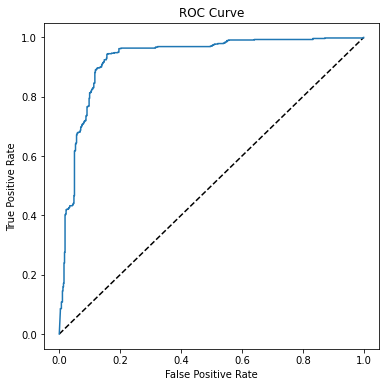

In [23]:
y_scores = model.predict_proba(X_test)
print(y_scores)

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Try a different algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       582
           1       0.97      0.99      0.98       585

    accuracy                           0.98      1167
   macro avg       0.98      0.98      0.98      1167
weighted avg       0.98      0.98      0.98      1167



In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[564  18]
 [  5 580]]


[[0.   1.  ]
 [1.   0.  ]
 [0.98 0.02]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]]


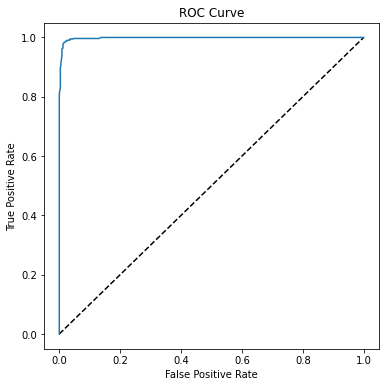

In [29]:
y_scores = model.predict_proba(X_test)
print(y_scores)

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Save the model

In [ ]:
import joblib
filename = '/models/malware_classification_model.pkl'
joblib.dump(model, filename)